# Notebook for testing Caption Generator Program Code

### Masking unnecessary warnings for easy readability

In [1]:
import logging
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

### Clearing the Tensorflow GPU Memory before training models.  Also enable memory growth on all GPUs

In [2]:
import tensorflow as tf

# Enable memory growth for all GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

E0000 00:00:1733640954.766161 1028794 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733640954.769608 1028794 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Set Paths for the Input Folders & Files to Handle

In [3]:
current_dir = os.getcwd()
# Path to dataset
dataset_path = os.path.join(current_dir, 'dataset')
# Image file path
image_file_path = os.path.join(current_dir, 'dataset', 'images')
# Path to models
model_path = os.path.join(current_dir, 'models')
# Path to generated data
generated_data_path = os.path.join(current_dir, 'generated_data')

# Path to caption text file
caption_text_file = dataset_path + '/' + 'captions.txt'
# Path to image files
image_files = dataset_path + '/' + 'images'

# Step 1: Download dataset from Kaggle

In [4]:
import os
from import_dataset import ImportData

current_dir = os.getcwd()
destination_path = os.path.join(current_dir, 'dataset')

DataImport = ImportData()

DataImport.download(destination_path)

Path to dataset files: /home/npate145/.cache/kagglehub/datasets/nunenuh/flickr8k/versions/2
Files and folders copied successfully.


# Step 2: Data Exploration

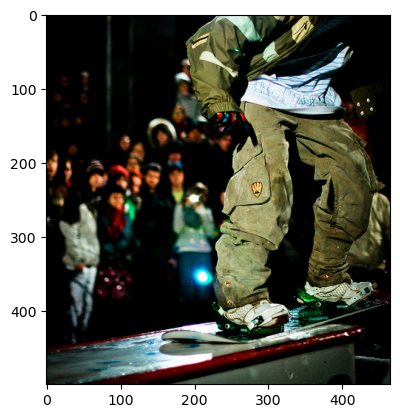

Shape of the Image  = (500, 465, 3)
3050264832_4215f2b398.jpg|0|A boy is standing on a snowboard in front of a crowd .

3050264832_4215f2b398.jpg|1|A crowd stands in the background watching someone sliding down a ramp on a board .

3050264832_4215f2b398.jpg|2|A crowd watching a snowboarder .

3050264832_4215f2b398.jpg|3|A man sliding on a concrete bench on his snowboard as people watch

3050264832_4215f2b398.jpg|4|Snowboarder is standing on his board while the crowd watches him .



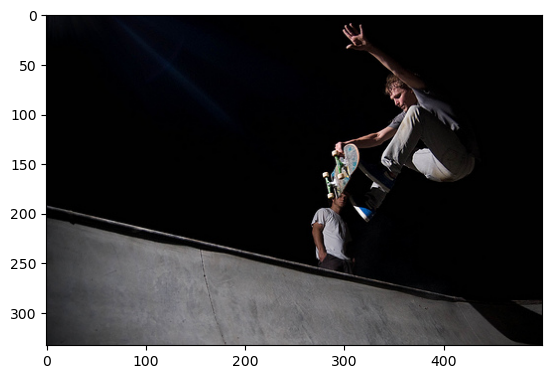

Shape of the Image  = (333, 500, 3)
3064097919_e536ab9693.jpg|0|A skateboarder is doing a trick at the top of a ramp while another person watches .

3064097919_e536ab9693.jpg|1|A skateboarder is doing a trick off of a ramp while a guy looks on .

3064097919_e536ab9693.jpg|2|A skateboarder is in midair in the middle of a trick .

3064097919_e536ab9693.jpg|3|A teenage boy does a skateboard trick on a half pipe while another boy watches from the top .

3064097919_e536ab9693.jpg|4|Young man doing a trick jump on a skateboard .



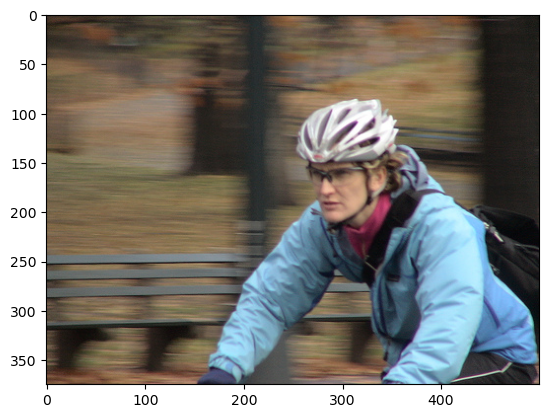

Shape of the Image  = (375, 500, 3)
2084217208_7bd9bc85e5.jpg|0|A person in a blue jacket , wearing a bicycle helmet is riding a bike

2084217208_7bd9bc85e5.jpg|1|A woman is riding her bicycle .

2084217208_7bd9bc85e5.jpg|2|A woman riding a bike in a park

2084217208_7bd9bc85e5.jpg|3|A woman with a blue jacket wears a helmet as she rides a bike .

2084217208_7bd9bc85e5.jpg|4|A woman with a helmet riding a bike .



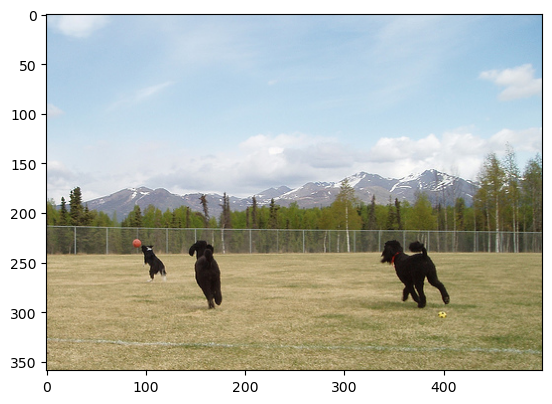

Shape of the Image  = (359, 500, 3)
3562470436_6e193643ce.jpg|0|Three black dogs playing in a fenced area with a ball .

3562470436_6e193643ce.jpg|1|Three black dogs running after an orange ball .

3562470436_6e193643ce.jpg|2|Three dogs are playing with a red ball in a field .

3562470436_6e193643ce.jpg|3|Three dogs play with a red ball .

3562470436_6e193643ce.jpg|4|Three dogs run after a ball in a field .



In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np

# Check shape of the images by using a random image 
files = [f for f in os.listdir(image_file_path) if os.path.isfile(os.path.join(image_file_path, f))]
image_files = files[:4]

# Check the contents of the caption text file
with open(caption_text_file, 'r') as file:
    lines = file.readlines()

for img in image_files:
    image = Image.open(os.path.join(image_file_path, img))
    image = np.array(image)

    plt.imshow(image)
    plt.show()

    print(f'Shape of the Image  = {image.shape}')

    for line in lines:
        if line.__contains__(img):
            print(line)

# Step 3: Image Feature Extraction

In [6]:
# Define what keras feature extraction model to use
feature_extraction_algo_name = 'Xception'

In [7]:
# %%script True

from feature_extractor import ExtractFeatures
import pickle
import time

# Instantiate the ExtractFeatures() class
FeatExtractor_Obj = ExtractFeatures(feature_extraction_algo_name)

# Load keras feature extraction model
FeatExtractor_Obj.init_model()

# Kick off timer
start_time = time.perf_counter()
# Extract Features from the Image data
image_features = FeatExtractor_Obj.extract_features(image_file_path)
# End timer
end_time = time.perf_counter()

feature_extraction_elapsed_time = float(end_time - start_time) * 10**6

# Save image features to a pickle file
pickle_file_name = os.path.join(generated_data_path, ('features_' + feature_extraction_algo_name + '.pkl'))
os.makedirs(os.path.dirname(pickle_file_name), exist_ok=True)
FeatExtractor_Obj.save_features(image_features, pickle_file_name)

print(f'Total Feature Extraction Time = {feature_extraction_elapsed_time:.03f} micro secs for {image_features}')

0it [00:00, ?it/s]

I0000 00:00:1733640960.177338 1028794 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4160 MB memory:  -> device: 0, name: NVIDIA RTX A3000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


  0%|          | 0/8091 [00:00<?, ?it/s]

I0000 00:00:1733640961.757502 1028937 service.cc:148] XLA service 0x7f0354036370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733640961.757525 1028937 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A3000 Laptop GPU, Compute Capability 8.6
I0000 00:00:1733640961.966692 1028937 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1733640964.012066 1028937 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Total Feature Extraction Time = 498765675.530 micro secs for {'3050264832_4215f2b398': array([[0.02027946, 0.00463417, 0.20685127, ..., 0.00652693, 0.04018338,
        0.        ]], dtype=float32), '3064097919_e536ab9693': array([[0.        , 0.32428157, 0.05803447, ..., 0.15684392, 0.19957043,
        0.        ]], dtype=float32), '2084217208_7bd9bc85e5': array([[0.1315994 , 0.26670864, 0.00353184, ..., 0.        , 0.08326236,
        0.8601729 ]], dtype=float32), '3562470436_6e193643ce': array([[0.6528777 , 0.24432552, 0.        , ..., 0.        , 0.03865516,
        0.22773637]], dtype=float32), '3604314527_5077cd9d43': array([[0.7771419 , 0.8228921 , 0.        , ..., 0.01301958, 0.        ,
        0.        ]], dtype=float32), '3545793128_af3af544dc': array([[0.00000000e+00, 1.23615615e-01, 1.49151087e-01, ...,
        2.28044088e-03, 8.52893791e-05, 3.59116912e-01]], dtype=float32), '2095007523_591f255708': array([[0.1763612 , 0.        , 0.00021056, ..., 0.        , 0.        ,


In [8]:
from feature_extractor import ExtractFeatures
import pickle
import time

# Instantiate the ExtractFeatures() class
FeatExtractor_Obj = ExtractFeatures(feature_extraction_algo_name)

loaded_features = dict()
# Load features from pickle file
pickle_file_name = os.path.join(generated_data_path, ('features_' + feature_extraction_algo_name + '.pkl'))
loaded_features = FeatExtractor_Obj.load_feature_model(pickle_file_name)

print(loaded_features)

{'3050264832_4215f2b398': array([[0.02027946, 0.00463417, 0.20685127, ..., 0.00652693, 0.04018338,
        0.        ]], dtype=float32), '3064097919_e536ab9693': array([[0.        , 0.32428157, 0.05803447, ..., 0.15684392, 0.19957043,
        0.        ]], dtype=float32), '2084217208_7bd9bc85e5': array([[0.1315994 , 0.26670864, 0.00353184, ..., 0.        , 0.08326236,
        0.8601729 ]], dtype=float32), '3562470436_6e193643ce': array([[0.6528777 , 0.24432552, 0.        , ..., 0.        , 0.03865516,
        0.22773637]], dtype=float32), '3604314527_5077cd9d43': array([[0.7771419 , 0.8228921 , 0.        , ..., 0.01301958, 0.        ,
        0.        ]], dtype=float32), '3545793128_af3af544dc': array([[0.00000000e+00, 1.23615615e-01, 1.49151087e-01, ...,
        2.28044088e-03, 8.52893791e-05, 3.59116912e-01]], dtype=float32), '2095007523_591f255708': array([[0.1763612 , 0.        , 0.00021056, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), '3596459539_a47aa80612'

In [9]:
%%script False
# Resetting GPU for the next job
from numba import cuda 
device = cuda.get_current_device()
device.reset()

Couldn't find program: 'False'


# Step 4: Loading and Preprocessing Caption Data

### Create image to caption mapping table

In [10]:
from caption_data_processing import CaptionDataProcessing

# Instantiate the LoadCaptionData() class
CaptionData_Obj = CaptionDataProcessing()

image_to_captions_mapping_table = CaptionData_Obj.image_to_caption_mapping(caption_text_file)

# Print the total number of captions
total_captions = sum(len(captions) for captions in image_to_captions_mapping_table.values())
print("Total number of captions:", total_captions)

0it [00:00, ?it/s]

  0%|          | 0/40456 [00:00<?, ?it/s]

Total number of captions: 40455


### Clean the image to caption mapping table

In [11]:
CaptionData_Obj.clean_data(image_to_captions_mapping_table)

image_to_captions_mapping_table

defaultdict(list,
            {'1000268201_693b08cb0e': ['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
              '<start> girl going into wooden building <end>',
              '<start> little girl climbing into wooden playhouse <end>',
              '<start> little girl climbing the stairs to her playhouse <end>',
              '<start> little girl in pink dress going into wooden cabin <end>'],
             '1001773457_577c3a7d70': ['<start> black dog and spotted dog are fighting <end>',
              '<start> black dog and tricolored dog playing with each other on the road <end>',
              '<start> black dog and white dog with brown spots are staring at each other in the street <end>',
              '<start> two dogs of different breeds looking at each other on the road <end>',
              '<start> two dogs on pavement moving toward each other <end>'],
             '1002674143_1b742ab4b8': ['<start> little girl covered in paint sits in fr

### Create tokenizer and save the tockens to a pickle file

In [12]:
# Creating a List of All Captions
all_captions = [caption for captions in image_to_captions_mapping_table.values() for caption in captions]
for caption in all_captions[0:20]:
    print(caption)

# Create tokenizer
tokenizer = CaptionData_Obj.tokenize_caption(all_captions)
print(tokenizer)

# Save mapping table to a pickle file
pickle_file_name = os.path.join(generated_data_path, ('tokenizer.pkl'))
os.makedirs(os.path.dirname(pickle_file_name), exist_ok=True)
CaptionData_Obj.save_tokenizer(tokenizer, pickle_file_name)

<start> child in pink dress is climbing up set of stairs in an entry way <end>
<start> girl going into wooden building <end>
<start> little girl climbing into wooden playhouse <end>
<start> little girl climbing the stairs to her playhouse <end>
<start> little girl in pink dress going into wooden cabin <end>
<start> black dog and spotted dog are fighting <end>
<start> black dog and tricolored dog playing with each other on the road <end>
<start> black dog and white dog with brown spots are staring at each other in the street <end>
<start> two dogs of different breeds looking at each other on the road <end>
<start> two dogs on pavement moving toward each other <end>
<start> little girl covered in paint sits in front of painted rainbow with her hands in bowl <end>
<start> little girl is sitting in front of large painted rainbow <end>
<start> small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it <end>
<start> there is girl with pigtails sitting in fron

### Load the tokenizers from pickle file

In [13]:
tokenizer = CaptionData_Obj.load_tokenizer(pickle_file_name)
print(tokenizer)

### Calcualte max caption length and total vocabulary size

In [14]:
max_caption_length = CaptionData_Obj.max_caption_length(tokenizer, all_captions)

vocab_size = CaptionData_Obj.vocabulary_size(tokenizer)

print(f'Max Caption Length is {max_caption_length} and Total Vocabulary Size is {vocab_size}')

Max Caption Length is 34 and Total Vocabulary Size is 8766


# Step 5: Data Preparation for Model Training

In [15]:
from data_generator import ModelDataGenerator

# Define the hyperparameters
BATCH_SIZE = 16

# Instantiate the ModelTrainDataPrep() Class
ModelTrainDataPrep_Obj = ModelDataGenerator()

# Split the train and test data into 7:2:1 ratio
train_data, test_data = ModelTrainDataPrep_Obj.create_model_dataset(image_to_captions_mapping_table)

# Test the data_generator() function with train_data
input_output_data = ModelTrainDataPrep_Obj.data_generator(train_data, 
                                                          image_to_captions_mapping_table,
                                                          loaded_features, 
                                                          tokenizer,
                                                          max_caption_length,
                                                          vocab_size,
                                                          batch_size=BATCH_SIZE)

print(len(train_data), len(test_data))

inputs, output = next(input_output_data)
print(inputs[0].shape, inputs[1].shape, output.shape)

7281 810
(16, 2048) (16, 34) (16, 8766)


# Step 6:  Model Architecture Buildnig and Training

In [16]:
%load_ext autoreload
%autoreload 2
from caption_generator_architecture import ModelArchitectureAndTraining
import time
from IPython.display import Javascript

# Define the hyperparameters
BATCH_SIZE = 16
EPOCHS = 100
LR = 0.001

# Instantiate ModelArchitectureAndTraining() class with required parameters
ModelArchitectureAndTraining_Obj = ModelArchitectureAndTraining(train_data, test_data, image_to_captions_mapping_table,
                                                                loaded_features, tokenizer, max_caption_length,
                                                                vocab_size, epochs=EPOCHS, batch_size=BATCH_SIZE, learning_rate=LR)

# Initiate the architecture 
architecture_model = ModelArchitectureAndTraining_Obj.model_architecture(feature_extraction_algo_name)
architecture_model.summary()

# Kick off timer
start_time = time.perf_counter()
# Train the model
model, history = ModelArchitectureAndTraining_Obj.train_model(architecture_model)
# End timer
end_time = time.perf_counter()

model_training_elapsed_time = float(end_time - start_time) * 10**6
print(f'Total Feature Extraction Time = {model_training_elapsed_time:.03f} micro secs for Model: \n{model.summary()}')

Javascript('Jupyter.notebook.execute_cell_range(17, 24)')


/home/npate145/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:932: UserWarning: Layer 'lambda' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048)      │      8,192 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 34, 256)   │  2,244,096 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 34, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 34)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 34, 256)   │          0 │ dense[0][0]       │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 34, 256)   │      1,024 │ dropout_1[0][0],  │
│ (BatchNormalizatio… │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 34, 512)   │  1,050,624 │ repeat_vector[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 34, 512)   │  1,050,624 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 34, 34)    │          0 │ bidirectional[0]… │
│                     │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 34, 34)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, None, 512) │          0 │ activation[0][0], │
│                     │                   │            │ bidirectional_1[… │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduce_sum          │ (None, 512)       │          0 │ lambda[0][0]      │
│ (ReduceSum)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 768)       │          0 │ reduce_sum[0][0], │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 7,328,830 (27.96 MB)

 Trainable params: 7,324,222 (27.94 MB)

 Non-trainable params: 4,608 (18.00 KB)

Running Epoch 1 of 100.............


/home/npate145/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:932: UserWarning: Layer 'ein_sum' (of type EinSum) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.1137 - loss: 6.6085 - val_accuracy: 0.1287 - val_loss: 6.2910
Running Epoch 2 of 100.............
455/455 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.1419 - loss: 4.8881 - val_accuracy: 0.1262 - val_loss: 6.1067
Running Epoch 3 of 100.............
455/455 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.1615 - loss: 4.5586 - val_accuracy: 0.1325 - val_loss: 6.6361
Running Epoch 4 of 100.............
455/455 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.1895 - loss: 4.2688 - val_accuracy: 0.1262 - val_loss: 7.0395
Running Epoch 5 of 100.............
455/455 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.2165 - loss: 4.0411 - val_accuracy: 0.1325 - val_loss: 7.0359
Running Epoch 6 of 100.............
455/455 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.2402 - loss: 3.7584 - val_accuracy: 0.1213 - val_loss: 7.1458
Running Epoch 7 of 100.............
455/455 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.2713 - loss: 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048)      │      8,192 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 34, 256)   │  2,244,096 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 34, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 34)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 34, 256)   │          0 │ dense[0][0]       │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 34, 256)   │      1,024 │ dropout_1[0][0],  │
│ (BatchNormalizatio… │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 34, 512)   │  1,050,624 │ repeat_vector[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 34, 512)   │  1,050,624 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 34, 34)    │          0 │ bidirectional[0]… │
│                     │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 34, 34)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, None, 512) │          0 │ activation[0][0], │
│                     │                   │            │ bidirectional_1[… │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduce_sum          │ (None, 512)       │          0 │ lambda[0][0]      │
│ (ReduceSum)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 768)       │          0 │ reduce_sum[0][0], │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 21,977,276 (83.84 MB)

 Trainable params: 7,324,222 (27.94 MB)

 Non-trainable params: 4,608 (18.00 KB)

 Optimizer params: 14,648,446 (55.88 MB)

Total Feature Extraction Time = 1469592685.960 micro secs for Model: 
None


<IPython.core.display.Javascript object>

In [17]:
%reload_ext autoreload
%autoreload 2

# Save the model to .keras file
filename = 'model.image_cation_generator_cnn_' + feature_extraction_algo_name + '_LR_' + str(LR) + '_BATCH_SIZE_' + str(BATCH_SIZE) + '_EPOCH_' + str(EPOCHS) + '.keras'
# filename = 'model.image_cation_generator_cnn_' + feature_extraction_algo_name + '.keras'
model_file = os.path.join(model_path, filename)
ModelArchitectureAndTraining_Obj.save_model(model, model_file)

In [18]:
%reload_ext autoreload
%autoreload 2

# Load the model to use for prediction
filename = 'model.image_cation_generator_cnn_' + feature_extraction_algo_name + '_LR_' + str(LR) + '_BATCH_SIZE_' + str(BATCH_SIZE) + '_EPOCH_' + str(EPOCHS) + '.keras'
# filename = 'model.image_cation_generator_cnn_' + feature_extraction_algo_name + '.keras'
model_file = os.path.join(model_path, filename)
image_caption_model = ModelArchitectureAndTraining_Obj.load_model(model_file)

/home/npate145/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:932: UserWarning: Layer 'lambda' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048)      │      8,192 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 34, 256)   │  2,244,096 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 34, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 34)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 34, 256)   │          0 │ dense[0][0]       │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 34, 256)   │      1,024 │ dropout_1[0][0],  │
│ (BatchNormalizatio… │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 34, 512)   │  1,050,624 │ repeat_vector[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 34, 512)   │  1,050,624 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 34, 34)    │          0 │ bidirectional[0]… │
│                     │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 34, 34)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, None, 512) │          0 │ activation[0][0], │
│                     │                   │            │ bidirectional_1[… │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduce_sum          │ (None, 512)       │          0 │ lambda[0][0]      │
│ (ReduceSum)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 768)       │          0 │ reduce_sum[0][0], │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 7,328,830 (27.96 MB)

 Trainable params: 7,324,222 (27.94 MB)

 Non-trainable params: 4,608 (18.00 KB)

None


# Step 7 Run Performance Metric Analysis

### Calculate the BLEU score of the model

In [19]:
%reload_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm
tqdm().pandas()
from model_predicton import ModelPrediction
from nltk.translate.bleu_score import corpus_bleu
import tensorflow as tf
from caption_generator_architecture import ModelArchitectureAndTraining
from tensorflow.keras.layers import Lambda

# Instantiate the ModelPrediction() class
ModelPrediction_Obj = ModelPrediction(image_caption_model)

# Initialize lists to store actual and predicted captions
actual_captions_list = []
predicted_captions_list = []

# Loop through the test data
for key in tqdm(test_data):
    # Get actual captions for the current image
    actual_captions = image_to_captions_mapping_table[key]
    # Predict the caption for the image using the model
    predicted_caption = ModelPrediction_Obj.predict_caption(loaded_features[key], tokenizer, max_caption_length)
    
    # Split actual captions into words
    actual_captions_words = [caption.split() for caption in actual_captions]
    # Split predicted caption into words
    predicted_caption_words = predicted_caption.split()
    
    # Append to the lists
    actual_captions_list.append(actual_captions_words)
    predicted_captions_list.append(predicted_caption_words)

# Calculate BLEU score
bleu_1_score = corpus_bleu(actual_captions_list, predicted_captions_list, weights=(1.0, 0, 0, 0))
bleu_2_score = corpus_bleu(actual_captions_list, predicted_captions_list, weights=(0.5, 0.5, 0, 0.0))

print("BLEU-1: %f" % bleu_1_score)
print("BLEU-2: %f" % bleu_2_score)

0it [00:00, ?it/s]

  0%|          | 0/810 [00:00<?, ?it/s]

/home/npate145/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:932: UserWarning: Layer 'ein_sum' (of type EinSum) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/npate145/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:932: UserWarning: Layer 'lambda' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


BLEU-1: 0.183142
BLEU-2: 0.069427


### Plot the accuracy and loss data

In [20]:
# A utility function to merge all the accuracy and loss values from history
def merge_dictionary_list(dict_list):
    return {
        k: [d.get(k) for d in dict_list if k in d] # explanation A
        for k in set().union(*dict_list) # explanation B
  }

print(history)
history = merge_dictionary_list(history)

history_data = {'train_accuracy': [], 'train_loss': [], 'valid_accuracy': [], 'valid_loss': []}

for key, value in history.items():
    for idx in value:
        # value1 = history[index]
        if key == 'accuracy':
            key = 'train_accuracy'
        if key == 'loss':
            key = 'train_loss'
        if key == 'val_accuracy':
            key = 'valid_accuracy'
        if key == 'val_loss':
            key = 'valid_loss'    
        history_data[key].append(idx[0])

history_data

[{'accuracy': [0.12142857164144516], 'loss': [6.138689994812012], 'val_accuracy': [0.1287499964237213], 'val_loss': [6.290956497192383]}, {'accuracy': [0.14244505763053894], 'loss': [4.959421634674072], 'val_accuracy': [0.1262499988079071], 'val_loss': [6.106667518615723]}, {'accuracy': [0.16126373410224915], 'loss': [4.606418609619141], 'val_accuracy': [0.13249999284744263], 'val_loss': [6.6360673904418945]}, {'accuracy': [0.18695054948329926], 'loss': [4.365154266357422], 'val_accuracy': [0.1262499988079071], 'val_loss': [7.0394673347473145]}, {'accuracy': [0.21565933525562286], 'loss': [4.110802173614502], 'val_accuracy': [0.13249999284744263], 'val_loss': [7.035888671875]}, {'accuracy': [0.24285714328289032], 'loss': [3.8263702392578125], 'val_accuracy': [0.12125000357627869], 'val_loss': [7.145803451538086]}, {'accuracy': [0.26456043124198914], 'loss': [3.6029224395751953], 'val_accuracy': [0.13625000417232513], 'val_loss': [7.57208251953125]}, {'accuracy': [0.28695055842399597], 

{'train_accuracy': [0.12142857164144516,
  0.14244505763053894,
  0.16126373410224915,
  0.18695054948329926,
  0.21565933525562286,
  0.24285714328289032,
  0.26456043124198914,
  0.28695055842399597,
  0.3115384578704834,
  0.3414835035800934,
  0.3719780147075653,
  0.3928571343421936,
  0.4204670190811157,
  0.44890108704566956,
  0.49065932631492615,
  0.5028846263885498,
  0.5484890341758728,
  0.5730769038200378,
  0.5986263751983643,
  0.6207417845726013,
  0.6491758227348328,
  0.6648351550102234,
  0.6864010691642761,
  0.707005500793457,
  0.7248626351356506,
  0.7267857193946838,
  0.7483516335487366,
  0.7579670548439026,
  0.7677198052406311,
  0.7825549244880676,
  0.7877747416496277,
  0.8038461804389954,
  0.8133241534233093,
  0.816895604133606,
  0.8193681240081787,
  0.8225274682044983,
  0.8362637162208557,
  0.8458791375160217,
  0.8475274443626404,
  0.8498626351356506,
  0.8659340739250183,
  0.8630494475364685,
  0.872802197933197,
  0.8785714507102966,
  0.882

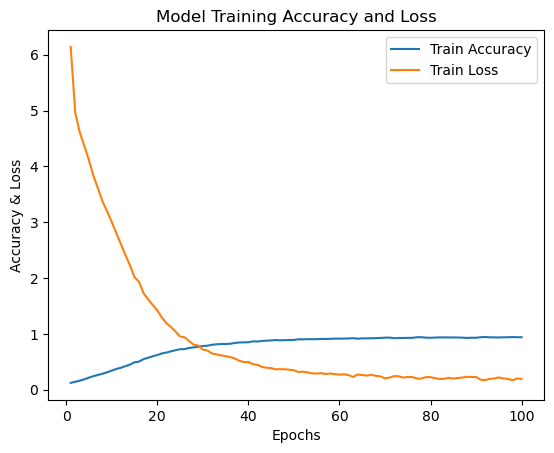

In [21]:
import matplotlib.pyplot as plt

train_accuracy = history_data['train_accuracy']
train_loss = history_data['train_loss']
# validation_accuracy = history_data['valid_accuracy']
# validation_loss = history_data['valid_loss']

# Plot the data
fig, ax = plt.subplots()
ax.plot(range(1, len(train_accuracy)+1), train_accuracy, label='Train Accuracy')
ax.plot(range(1, len(train_loss)+1), train_loss, label='Train Loss')
# ax.plot(range(1, len(validation_accuracy)+1), validation_accuracy, label='Validation Accuracy')
# ax.plot(range(1, len(validation_loss)+1), validation_loss, label='Validation Loss')

# Add title
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy & Loss')
ax.set_title('Model Training Accuracy and Loss')

# Add a legend
plt.legend()
plt.show()

### Save the complete performance metrics alongwith hyperparameters to a pickle file to be used again

In [22]:
from pickle import dump
import os

filename = 'metric_' + feature_extraction_algo_name + '_LR_' + str(LR) + '_BATCH_SIZE_' + str(BATCH_SIZE) + '_EPOCH_' + str(EPOCHS) + '.pkl'
analytic_data_file = os.path.join(generated_data_path, filename)

analytic_data = [history, 
                 bleu_1_score, 
                 bleu_2_score, 
                 feature_extraction_algo_name, 
                 LR, 
                 BATCH_SIZE, 
                 EPOCHS, 
                 model_training_elapsed_time, 
                 len(loaded_features), 
                 vocab_size, 
                 max_caption_length,
                 tokenizer,
                 feature_extraction_elapsed_time]

with open(analytic_data_file, 'wb') as file:
    dump(analytic_data, file)

### Test Model With a Random Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
36422830_55c844bc2d
---------------------Actual Caption---------------------
<start> four wheel drive car is navigating along rocky off road trail <end>
<start> jeep sidewalks on some rocks <end>
<start> red jeep hangs from the edge of rocky cliff as girl looks on <end>
<start> red truck is driving over rocky surface <end>
<start> woman stands next to red suv that has run off into ditch <end>
--------------------Predicted Caption--------------------
start child colorful bus is pulled off to the side of the camera as its passengers load end


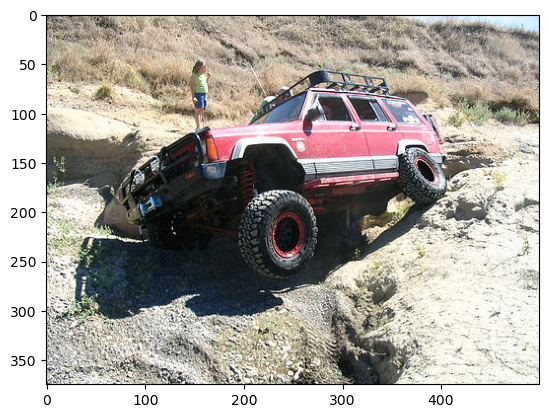

In [23]:
%load_ext autoreload
%autoreload 2

from model_predicton import ModelPrediction
from tensorflow.keras.models import load_model
import os
from PIL import Image
from pickle import load
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import corpus_bleu

filename = 'model.image_cation_generator_cnn_' + feature_extraction_algo_name + '_LR_' + str(LR) + '_BATCH_SIZE_' + str(BATCH_SIZE) + '_EPOCH_' + str(EPOCHS) + '.keras'
model_file = os.path.join(os.getcwd(), 'models', filename)
caption_generator_model = load_model(model_file)

ModelPrediction_Obj = ModelPrediction(caption_generator_model)

# Function for generating caption
def generate_caption(image_name):
    filename = 'metric_' + feature_extraction_algo_name + '_LR_' + str(LR) + '_BATCH_SIZE_' + str(BATCH_SIZE) + '_EPOCH_' + str(EPOCHS) + '.pkl'
    with open(os.path.join(os.getcwd(), 'generated_data', filename), 'rb') as file:
        data = load(file)
        tokenizer = data[11]
        max_caption_length = data[10]

    # load the image
    image_id = image_name.split('.')[0]
    print(image_id)
    img_path = os.path.join(image_file_path, image_name)
    image = Image.open(img_path)
    captions = image_to_captions_mapping_table[image_id]
    print('---------------------Actual Caption---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    predict_result = ModelPrediction_Obj.predict_caption(loaded_features[image_id], tokenizer, max_caption_length)
    print('--------------------Predicted Caption--------------------')
    print(predict_result)
    plt.imshow(image)

generate_caption('36422830_55c844bc2d.jpg')

### Plotting Performance Metrics

50


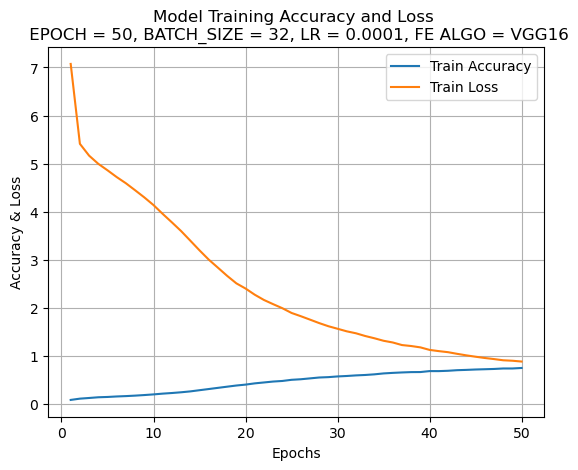

100


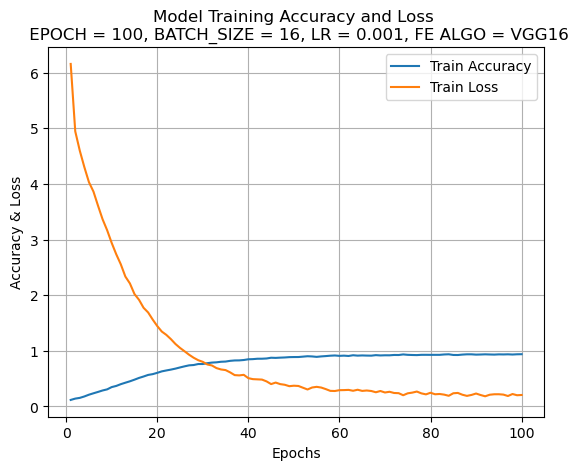

100


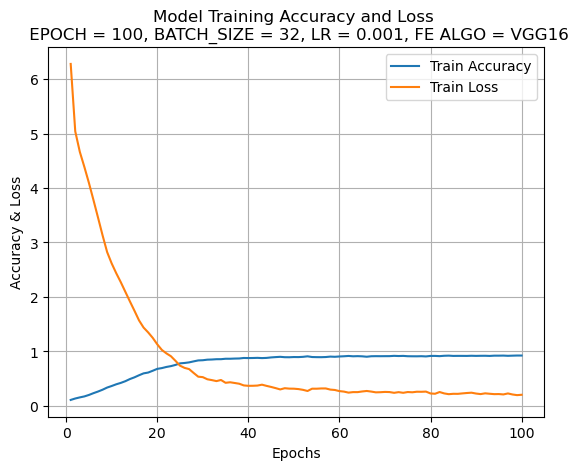

50


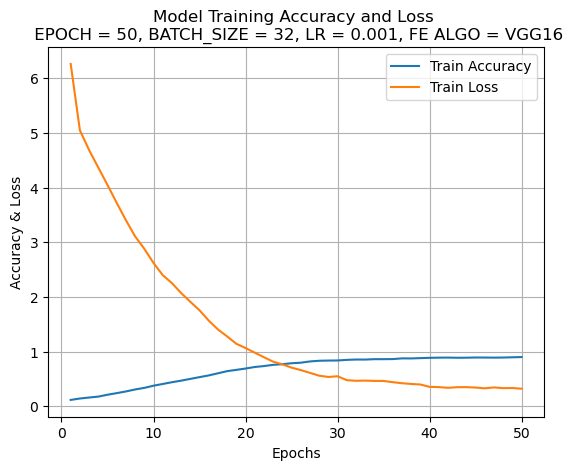

80


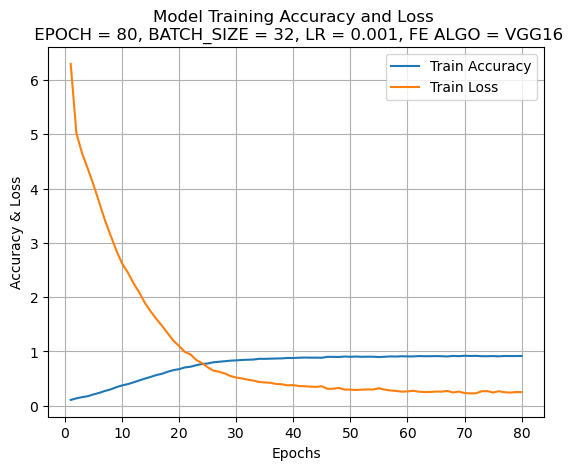

50


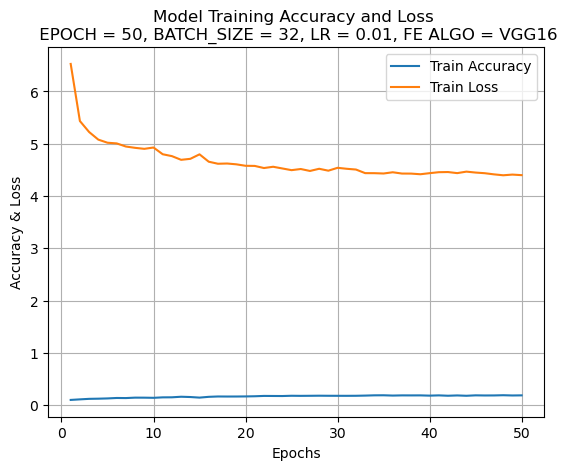

50


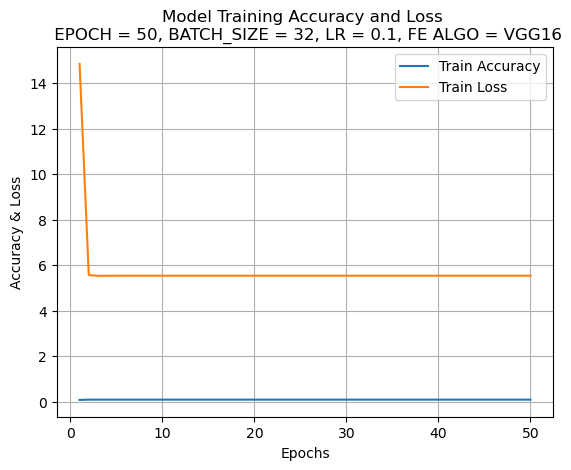

50


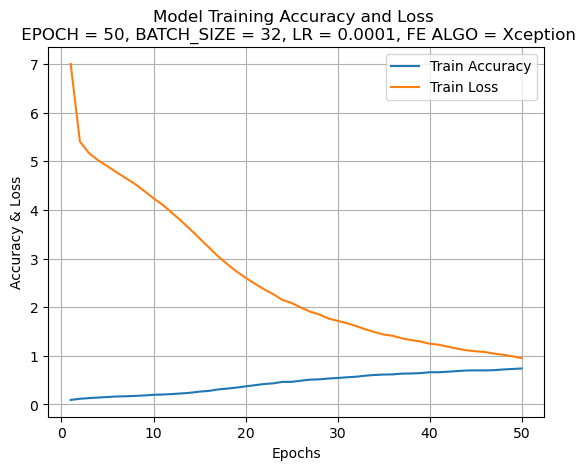

100


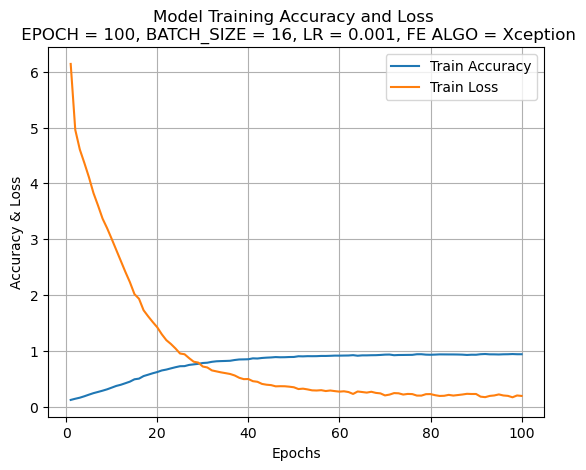

100


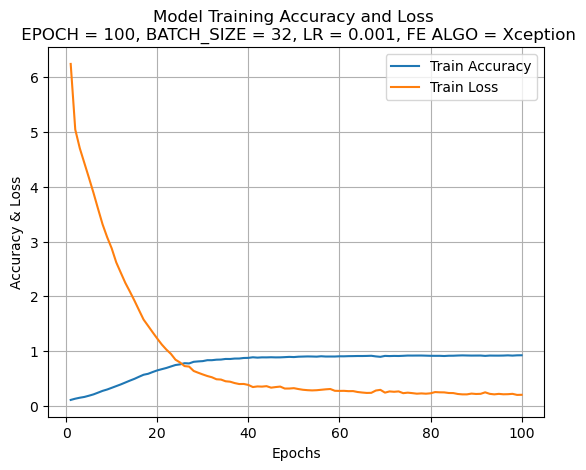

50


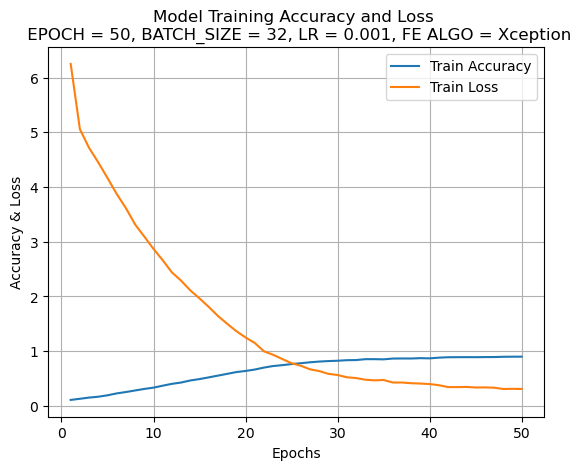

80


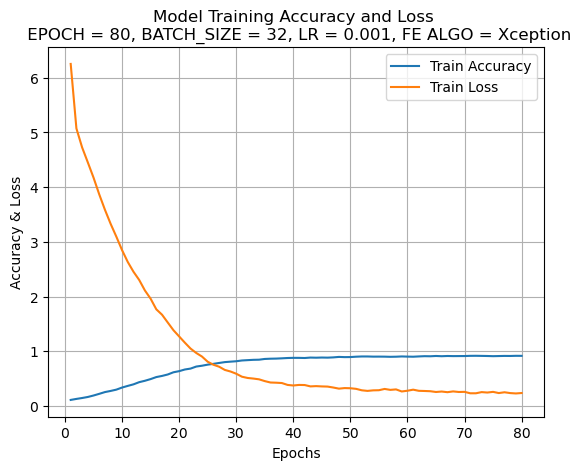

50


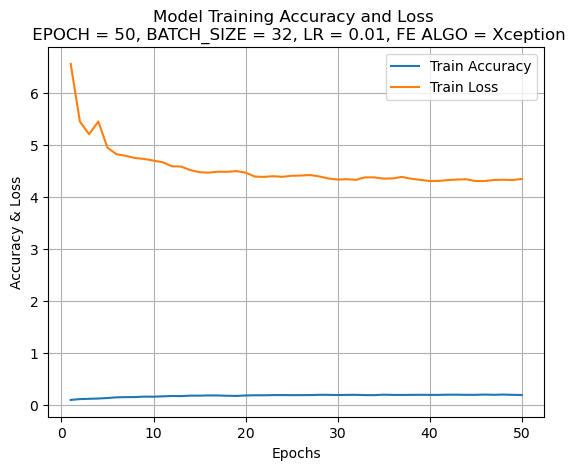

50


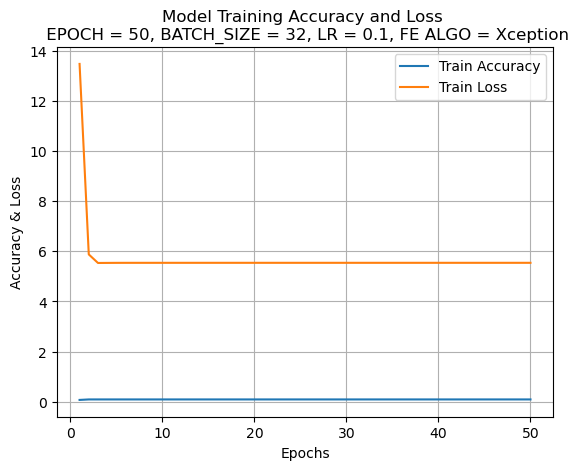

In [24]:
import os
from pickle import load
import matplotlib.pyplot as plt

def get_file_names(directory):
    file_names = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            file_names.append(filename)
    return file_names

file_list = get_file_names(generated_data_path)
file_list = sorted(file_list)

for f in file_list:
    if f.__contains__('metric_'):
        filepath = os.path.join(generated_data_path, f)
        with open(filepath, 'rb') as file:
            analytical_data = load(file)

        filename_field = str(f).split('_')
        epoch = filename_field[8].split('.')[0]
        print(epoch)
        fe_algo = filename_field[1]
        lr = filename_field[3]
        batch_size = filename_field[6]

        train_accuracy = analytical_data[0]['accuracy']
        train_loss = analytical_data[0]['loss']

        # Plot the data
        # fig, ax = plt.subplots()
        plt.plot(range(1, len(train_accuracy)+1), train_accuracy, label='Train Accuracy')
        plt.plot(range(1, len(train_loss)+1), train_loss, label='Train Loss')
        # ax.plot(range(1, len(validation_accuracy)+1), validation_accuracy, label='Validation Accuracy')
        # ax.plot(range(1, len(validation_loss)+1), validation_loss, label='Validation Loss')

        # Add title
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy & Loss')
        model_para = f'EPOCH = {epoch}, BATCH_SIZE = {batch_size}, LR = {lr}, FE ALGO = {fe_algo}'
        plt.title(f'Model Training Accuracy and Loss \n {model_para}')
        plt.grid(True)
        
        # plt.text(0.5, -0.20, model_para, transform=plt.gca().transAxes, ha='center')

        # Add a legend
        plt.legend()
        plt.show()

### Table of Performance Metrics

In [25]:
len(analytical_data)

12

In [40]:
import os
from pickle import load
import pandas as pd

# Display scientific notation for clarity
pd.options.display.float_format = '{:20,.4f}'.format

def get_file_names(directory):
    file_names = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            file_names.append(filename)
    return file_names

file_list = get_file_names(generated_data_path)
file_list = sorted(file_list)
metric_data = {'Feature Extraction Algo Name': [],
               'Feature Extraction Time': [],
                'Batch Size': [],
                'Epochs': [],
                'Learning Rate': [],
                'Model Training Time': [],
                'Training Accuracy': [],
                'Training Loss': [],
                'BLEU 1 Score': [],
                'BLEU 2 Score': []}

for f in file_list:
    if f.__contains__('metric_'):
        filepath = os.path.join(generated_data_path, f)
        with open(filepath, 'rb') as file:
            analytical_data = load(file)

        filename_field = str(f).split('_')
        epoch = filename_field[8].split('.')[0]
        # print(epoch)
 
        train_accuracy = (analytical_data[0]['accuracy'][-1])[0]
        train_loss = (analytical_data[0]['loss'][-1])[0]
        bleu_1_score = analytical_data[1]
        bleu_2_score = analytical_data[2]
        fe_algo_name = analytical_data[3]
        learning_rate = analytical_data[4]
        batch_size = analytical_data[5]
        epochs = analytical_data[6]
        model_training_time = analytical_data[7] // 10**6
        feature_extraction_time = analytical_data[12]

        metric_data['Feature Extraction Algo Name'].append(fe_algo_name)
        metric_data['Feature Extraction Time'].append('{:.1f}'.format(feature_extraction_time))
        metric_data['Batch Size'].append(batch_size)
        metric_data['Epochs'].append(epochs)
        metric_data['Learning Rate'].append(learning_rate)
        metric_data['Model Training Time'].append('{:.1f}'.format(model_training_time))
        metric_data['Training Accuracy'].append('{:.2f}'.format(train_accuracy))
        metric_data['Training Loss'].append('{:.2f}'.format(train_loss))
        metric_data['BLEU 1 Score'].append(bleu_1_score)
        metric_data['BLEU 2 Score'].append(bleu_2_score)            
        
metric_df = pd.DataFrame(metric_data)
metric_df.to_csv('your_file_name.csv', index=False)
print(metric_df)


   Feature Extraction Algo Name Feature Extraction Time  Batch Size  Epochs  \
0                         VGG16             512015634.3          32      50   
1                         VGG16             515254184.5          16     100   
2                         VGG16             512015634.3          32     100   
3                         VGG16             512015634.3          32      50   
4                         VGG16             500015634.3          32      80   
5                         VGG16             512015634.3          32      50   
6                         VGG16             512015634.3          32      50   
7                      Xception             498765675.5          32      50   
8                      Xception             498765675.5          16     100   
9                      Xception             498765675.5          32     100   
10                     Xception             498765675.5          32      50   
11                     Xception             47922590

In [39]:
%%script False
from pickle import load, dump
import pandas as pd

# Display scientific notation for clarity
pd.options.display.float_format = '{:20,.4f}'.format

def get_file_names(directory):
    file_names = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            file_names.append(filename)
    return file_names

file_list = get_file_names(generated_data_path)
file_list = sorted(file_list)

for f in file_list:
    if f.__contains__('metric_') and f.__contains__('VGG16'):
        filepath = os.path.join(generated_data_path, f)
        with open(filepath, 'rb') as file:
            analytical_data = load(file)

        if len(analytical_data) == 12:
            # Append the new element
            analytical_data.append(512015634.291)

            # Save the updated list back to the file
            with open(filepath, 'wb') as f:
                dump(analytical_data, f)
                f.close()
    elif f.__contains__('metric_') and f.__contains__('Xception'):
        filepath = os.path.join(generated_data_path, f)
        with open(filepath, 'rb') as file:
            analytical_data = load(file)

        if len(analytical_data) == 12:
            # Append the new element
            analytical_data.append(498765675.530)

            # Save the updated list back to the file
            with open(filepath, 'wb') as f:
                dump(analytical_data, f)
                f.close()

Couldn't find program: 'False'
